In [26]:
import serial
import threading
import time
import csv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [27]:
# ======= Configuración general =======
SERIAL_PORT = 'COM11'        # Cambia según tu sistema
BAUD_RATE = 115200
MAX_POINTS = 200            # Cantidad máxima de puntos en el gráfico
CSV_FILENAME = "datos_ph.csv"

# ======= Variables globales =======
times = []
voltajes = []
phs = []
start_time = time.time()

# ======= Abrir archivo CSV =======
csv_file = open(CSV_FILENAME, mode='w', newline='')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Tiempo (s)", "Voltaje (V)", "pH"])  # Cabeceras

27

In [28]:
# ======= Función para leer el puerto serial =======
def serial_reader():
    """Lee líneas del serial, parsea voltaje y pH y guarda en CSV."""
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
    while True:
        line = ser.readline().decode(errors='ignore').strip()
        if not line:
            continue
        try:
            if "Voltaje:" in line and "pH:" in line:
                volt_text, ph_text = line.split("|")
                v = float(volt_text.replace("Voltaje:", "").replace("V", "").strip())
                p = float(ph_text.replace("pH:", "").strip())
            else:
                continue
        except Exception as e:
            print(f"Error al parsear: {line} -> {e}")
            continue

        t = time.time() - start_time
        times.append(t)
        voltajes.append(v)
        phs.append(p)

        if len(times) > MAX_POINTS:
            times.pop(0)
            voltajes.pop(0)
            phs.pop(0)

        csv_writer.writerow([t, v, p])
        csv_file.flush()

        print(f"Voltaje={v:.3f} V, pH={p:.2f}")

C:\Users\angel\AppData\Local\Temp\ipykernel_3172\320935620.py:30: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=200)


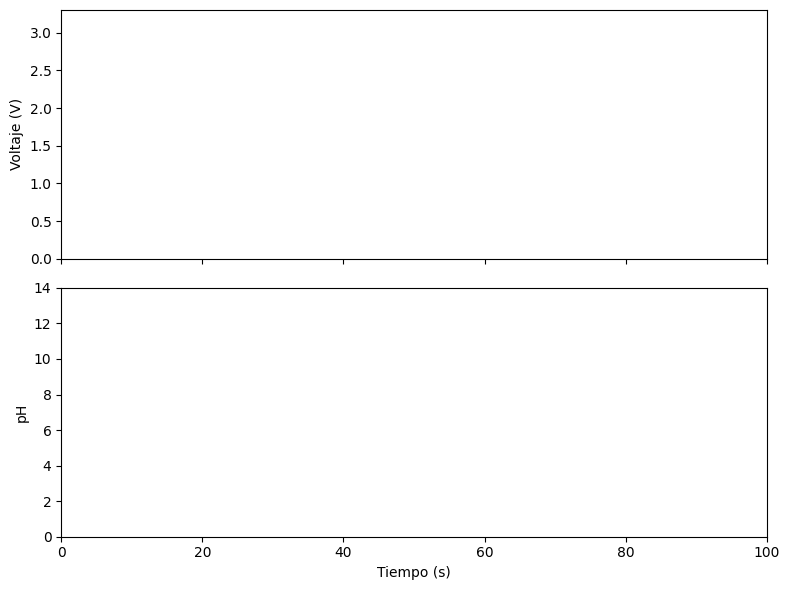

Voltaje=0.577 V, pH=55.06
Voltaje=0.274 V, pH=62.65
Voltaje=0.232 V, pH=63.69
Voltaje=0.229 V, pH=63.77
Voltaje=0.219 V, pH=64.02
Voltaje=0.219 V, pH=64.02
Voltaje=0.210 V, pH=64.26
Voltaje=0.174 V, pH=65.14
Voltaje=0.148 V, pH=65.79
Voltaje=0.123 V, pH=66.44
Voltaje=0.123 V, pH=66.44
Voltaje=0.113 V, pH=66.68
Voltaje=0.106 V, pH=66.84
Voltaje=0.103 V, pH=66.92
Voltaje=0.103 V, pH=66.92
Voltaje=0.103 V, pH=66.92
Voltaje=0.100 V, pH=67.00
Voltaje=0.106 V, pH=66.84
Voltaje=0.103 V, pH=66.92
Voltaje=0.106 V, pH=66.84
Voltaje=0.097 V, pH=67.08
Voltaje=0.103 V, pH=66.92
Voltaje=0.106 V, pH=66.84
Voltaje=0.110 V, pH=66.76
Voltaje=0.116 V, pH=66.60
Voltaje=0.129 V, pH=66.27
Voltaje=0.135 V, pH=66.11
Voltaje=0.161 V, pH=65.47
Voltaje=0.194 V, pH=64.66
Voltaje=0.219 V, pH=64.02
Voltaje=0.226 V, pH=63.85
Voltaje=0.235 V, pH=63.61
Voltaje=0.232 V, pH=63.69
Voltaje=0.239 V, pH=63.53
Voltaje=0.232 V, pH=63.69
Voltaje=0.235 V, pH=63.61
Voltaje=0.239 V, pH=63.53
Voltaje=0.242 V, pH=63.45
Voltaje=0.24

In [29]:
# ======= Código principal =======
try:
    # Inicia el hilo que lee del puerto serial
    thread = threading.Thread(target=serial_reader, daemon=True)
    thread.start()

    # Configuración de la figura de Matplotlib
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    ax1.set_ylabel("Voltaje (V)")
    ax2.set_ylabel("pH")
    ax2.set_xlabel("Tiempo (s)")

    line1, = ax1.plot([], [], lw=2)
    line2, = ax2.plot([], [], lw=2)

    def init():
        ax1.set_xlim(0, MAX_POINTS * 0.5)
        ax1.set_ylim(0, 3.3)  # Ajusta si tu VREF es diferente
        ax2.set_ylim(0, 14)
        return line1, line2

    def update(frame):
        if times:
            ax1.set_xlim(times[0], times[-1])
            ax2.set_xlim(times[0], times[-1])
            line1.set_data(times, voltajes)
            line2.set_data(times, phs)
        return line1, line2

    ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=200)

    plt.tight_layout()
    plt.show()

    while thread.is_alive():
        time.sleep(1)

    print("Programa finalizado.")

except KeyboardInterrupt:
    print("Interrupción del usuario. Cerrando...")
finally:
    csv_file.close()